# Data Pre-Processing

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset from Google Drive
file_path = "/content/drive/MyDrive/Final Project/data/US_Accidents_Sample.csv"
df = pd.read_csv(file_path)

# Specify the best performing set of features
columns = [
    'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
    'Distance(mi)', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
    'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
    'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
    'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
    'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal'
]

# Separate features and target
X = df[columns]  # Features
y_raw = df['Severity']  # Target (raw labels)

# Stratified split to ensure each class is represented in both training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train_raw, y_val_raw = train_test_split(X, y_raw, test_size=0.2, random_state=42, stratify=y_raw)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# One-hot encode the target variable
y_val = pd.get_dummies(y_val_raw - 1).values  # Adjust to one-hot encoding for validation labels

# Import the Best Model from Phase 4

In [7]:
# Load the saved model trained on the best features
model_path = "/content/drive/MyDrive/Final Project/Models/model_subset_29.keras"  # Replace with the correct saved model path
model = load_model(model_path)

# Calculate ROC

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


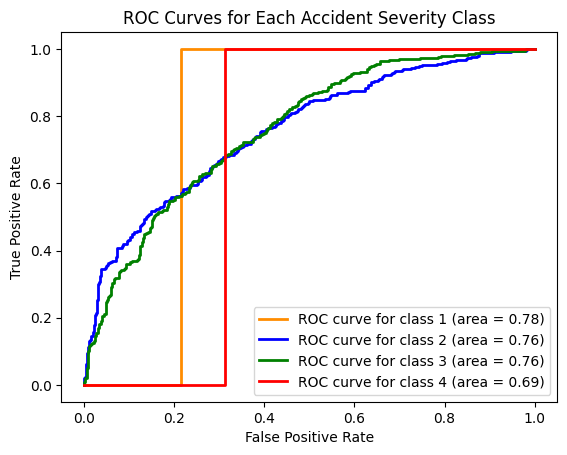

In [8]:
# Predict probabilities for the validation set
y_prob = model.predict(X_val)

# Calculate ROC curve for each class
plt.figure()
colors = ['darkorange', 'blue', 'green', 'red']
for i in range(4):
    fpr, tpr, _ = roc_curve(y_val[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'ROC curve for class {i+1} (area = {roc_auc:.2f})')

# Add title, labels, and legend
plt.title('ROC Curves for Each Accident Severity Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show plot
plt.show()


In [10]:
 %%shell
 jupyter nbconvert --to html "/content/drive/MyDrive/Final Project/Phase 5/Phase 5.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Final Project/Phase 5/Phase 5.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 340409 bytes to /content/drive/MyDrive/Final Project/Phase 5/Phase 5.html
